In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-06-07 16:39:44.334150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras import utils

dir = '/Users/hrohra/Documents/ml/imageclassification/notebooks/Bone Break Classification/Bone Break Classification/'
train_data = utils.image_dataset_from_directory(
    dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

val_data = utils.image_dataset_from_directory(
    dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1249 files belonging to 11 classes.
Using 1125 files for training.
Found 1249 files belonging to 11 classes.
Using 124 files for validation.


In [5]:
class_names = train_data.class_names
class_names

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Healthy Bone',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

2024-06-07 16:39:59.901282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


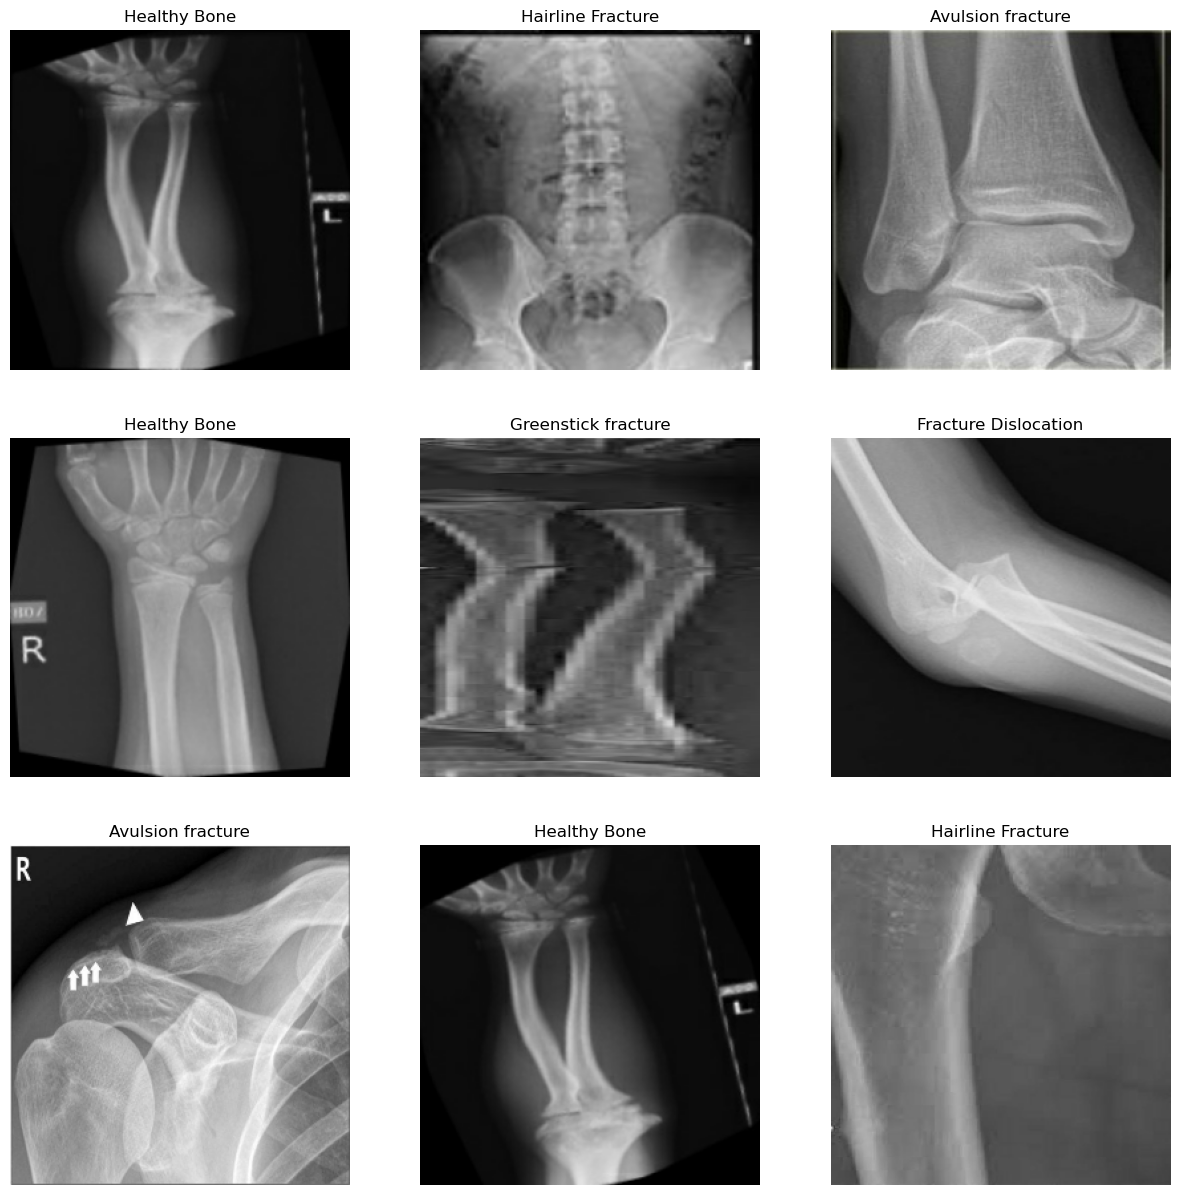

In [6]:
plt.figure(figsize=(15,15))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

2024-06-07 16:40:05.642813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


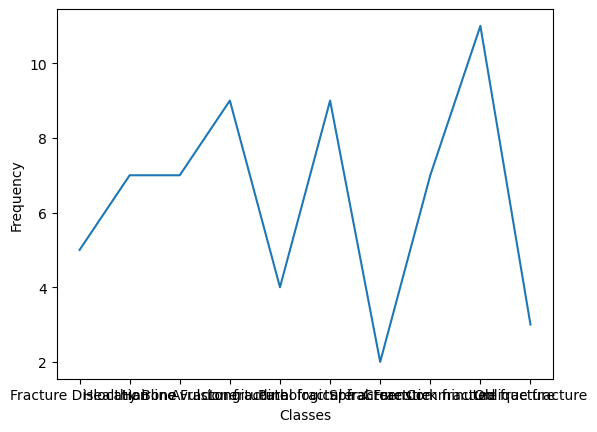

In [7]:
freq = {}
for images, labels in train_data.take(1):
    for i in range(len(labels)):
        freq[class_names[labels[i]]] = freq.get(class_names[labels[i]], 0)+1
plt.plot(freq.keys(), freq.values())
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size = AUTOTUNE)

In [9]:
x_train = []
y_train = []

for images, labels in train_data:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())
x_train = np.concatenate(x_train, axis = 0)
print(x_train.shape)
y_train = np.concatenate(y_train, axis = 0)
print(y_train.shape) 

2024-06-07 16:40:16.569776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(1125, 256, 256, 3)
(1125,)


In [10]:
x_val = []
x_test = []
y_val = []
y_test = []
test = False

for images, labels in val_data:
    if(not test):
        x_val.append(images.numpy())
        y_val.append(labels.numpy())
    else:
        x_test.append(images.numpy())
        y_test.append(labels.numpy())
    test = not test
x_val = np.concatenate(x_val, axis = 0)
y_val = np.concatenate(y_val, axis = 0)
print("Validation data shape:")
print("Images:- ",x_val.shape)
print("Labels:- ",y_val.shape)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis = 0)
print("Test Data Shape: ")
print("Images:- ",x_test.shape)
print("Labels:- ",y_test.shape)

2024-06-07 16:40:22.754364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation data shape:
Images:-  (64, 256, 256, 3)
Labels:-  (64,)
Test Data Shape: 
Images:-  (60, 256, 256, 3)
Labels:-  (60,)


In [11]:
num_classes = len(class_names)
num_classes

11

In [12]:
y_train = utils.to_categorical(y_train, num_classes)
print(y_train.shape)
y_test = utils.to_categorical(y_test, num_classes)
print(y_test.shape)
y_val = utils.to_categorical(y_val, num_classes)
print(y_val.shape)

(1125, 11)
(60, 11)
(64, 11)


In [13]:
print(x_train.shape)

(1125, 256, 256, 3)


In [14]:
from tensorflow.keras import models

input_layer = layers.Input(shape=(256,256,3))
rescale_layer = layers.Rescaling(1./255, input_shape = (256,256,3))(input_layer)

x = layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    strides = 2,
    padding = "same"
)(rescale_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    strides = 2,
    padding = "same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    strides = 2,
    padding = "same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=11, activation="softmax")(x)

model = models.Model(input_layer, output_layer)
model.summary()

/usr/local/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,298,187 (12.58 MB)

 Trainable params: 3,297,795 (12.58 MB)

 Non-trainable params: 392 (1.53 KB)

In [15]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate = 0.0005)

model.compile(loss="categorical_crossentropy",optimizer = opt, metrics=['accuracy'])

In [16]:
history = model.fit(
    x_train,
    y_train,
    shuffle=True,
    batch_size=32,
    epochs=10,
    validation_data=(x_val, y_val),
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.1790 - loss: 2.7027 - val_accuracy: 0.1406 - val_loss: 2.5216
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4153 - loss: 1.7543 - val_accuracy: 0.4375 - val_loss: 1.6707
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5881 - loss: 1.3139 - val_accuracy: 0.6719 - val_loss: 1.0989
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7219 - loss: 0.9260 - val_accuracy: 0.6562 - val_loss: 1.0671
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8708 - loss: 0.5959 - val_accuracy: 0.9375 - val_loss: 0.4598
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9221 - loss: 0.4232 - val_accuracy: 0.9375 - val_loss: 0.3491
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9729 - loss: 0.2824 - val_accuracy: 0.9531 - val_loss: 0.3395
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9730 - loss: 0.2239 - val_accuracy: 0.9531 - val_loss:

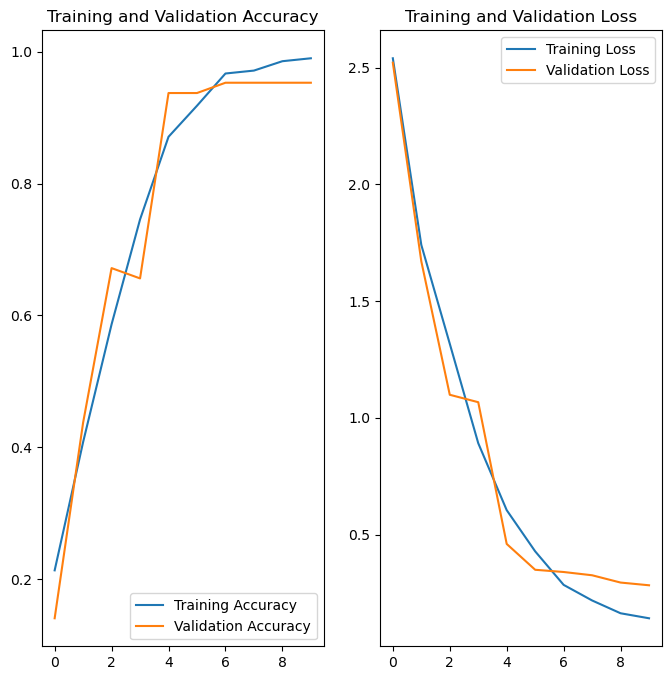

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Testing Results:")
print("Accuracy:- ",test_accuracy)
print("Loss:- ",test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9889 - loss: 0.0682
Testing Results:
Accuracy:-  0.9833333492279053
Loss:-  0.0788760632276535


In [19]:
prediction = model.predict(x_test)
prob_pred = np.argmax(prediction, axis = 1)
cat_pred = [class_names[x] for x in prob_pred]
print(class_names[np.argmax(y_test[5])])
print(cat_pred[5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step
Impacted fracture
Impacted fracture


In [20]:
import joblib
joblib.dump(model, 'Model.pkl')

['Model.pkl']